# HPC@UCLA: Interactive Computing on H2C

## Raffaella D'Auria, PhD

### Today Learning Outcomes

- how to follow this presentation on a terminal or on a jupyter notebook
- the Hoffman2 Cluster: system overview [recap]
- working interactively on the Hoffman2 Cluster
- where to look for applications already available on Hoffman2


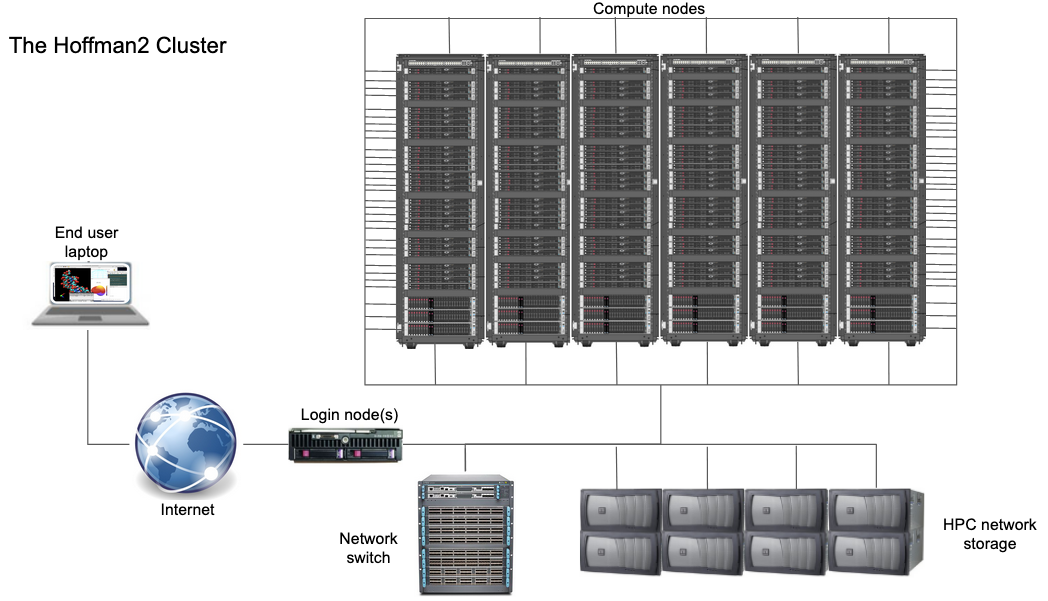

## How to follow this presentation

You can of course just follow by listening to the presentation, but if you can try out various commands it will help build your skills on using the cluster.

To try out the various commands that will be showcased, in this presentation we assume that: 

- you already have an account on the Hoffman2 Cluster
- on your local computer you have access to a terminal and an SSH client or you have installed a remote desktop to connect to the cluster 


## Where is the slide deck for this presentartion?

Navigate to:

https://github.com/rdauria/HPC_at_UCLA

and look for:

https://github.com/rdauria/HPC_AT_UCLA/blob/master/Interactive_Computing_on_H2C.ipynb


## Run this presentation as a Jupyter Notebook

- NOTE: you should have python installed (**any version other than the deprecated 3.8.x**)
   * if you are running Ubuntu version 20.04 on WSL consider updating with:
   
     `sudo apt update && sudo apt full-upgrade`
     
   * restart Ubuntu (open a Windows PowerShell and issue: `wsl --shutdown`) and at the Ubuntu prompt issue:
     
        `sudo do-release-upgrade`
       
- open a terminal (**not connected to the cluster**) and issue:

  `curl -O https://raw.githubusercontent.com/rdauria/jupyter-notebook/main/h2jupynb`

- NOTE: **from a Windows PowerShell you may need to use instead**:

  `curl.exe -O https://raw.githubusercontent.com/rdauria/jupyter-notebook/main/h2jupynb`

- start a jupyter session with:

  `python h2jupynb -u <YOURHOFFMAN2ACCOUNTNAME>` # you will be prompted for your H2C password twice

- NOTE: **you may need to use**

  `python3 h2jupynb -u <YOURHOFFMAN2ACCOUNTNAME> # you will be prompted for your H2C password twice`

- when the jupyter session starts, open a terminal (on hte jupyter interface) and issue:

 `curl -O https://raw.githubusercontent.com/rdauria/HPC_AT_UCLA/refs/heads/master/Interactive_Computing_on_H2C.ipynb`

- return to the jupyter landing page and double click on: `InteractiveComputingonH2C.ipynb`
___
To learn how to do so see: https://github.com/rdauria/HPC_at_UCLA/blob/main/INTRO_TO_H2C.ipynb and https://www.hoffman2.idre.ucla.edu/Using-H2/Connecting/Connecting.html#connecting-via-jupyter-notebook-lab 

## How to run this presentation on a terminal

If you use a [terminal and SSH to connect to the Hoffman2 Cluster](https://public.hoffman2.idre.ucla.edu/systems/5EHNT/INTRO_TO_H2C.slides.html#/12):

1. open a terminal on your local computer and SSH into the Hoffman2 Cluster with the command (substitute `joebruin` w/ your Hoffman2 user name):

   `ssh joebruin@hoffman2.idre.ucla.edu`

2. when applicable cut and paste the commands from the slides omitting the `$` character which is included to indicate the unix (or terminal) prompt

A summary of the commands is also available as a text file in:

https://github.com/rdauria/HPC_AT_UCLA/blob/master/Hands-on-interactive-computing-on-H2C.txt



## The cluster at your fingertips


In [1]:
CLUSTER_AT_A_GLANCE

CPU-type		# nodes		#cores/node	# tot. cores		memory/core (GB)	tot memory (GB)
amd-5955                1	       16		       16		 15.738			 251.800
amd-7542                2	       32		       64		 15.741			 503.700
amd-epyc-7642           5	       48		      240		 10.496			 503.800
amd-epyc-9654           1	      112		      112		 13.496			 1511.600
intel-E5-2650           4	       16		       64		 15.744			 251.900
intel-E5-2650v2         9	       16		      144		 15.744			 251.900
intel-E5-2650v2        35	       16		      560		 3.931			 62.900
intel-E5-2650v4        67	       24		     1608		 5.242			 125.800
intel-E5-2650v4         4	       24		       96		 10.492			 251.800
intel-E5-2650v4         5	       24		      120		 15.742			 377.800
intel-E5-2650v4         2	       24		       48		 20.992			 503.800
intel-E5-2650v4        54	       24		     1296		 2.617			 62.800
intel-E5-2670           1	       16		       16		 7.869			 125.900
intel-E5-2670           2	       16		       32		 15.731	

### What type of compute nodes by GPUs & availability


In [2]:
GPU_NODES_AT_A_GLANCE_WITH_USED_GPUs

 NODE          GPU  #GPUs  #Used/#GPUs  CompCap                CPU  #CPUs     Mem  GPUglobmem
  g17         H100      1          1/1      9.0   intel-gold-6442Y     48    512G         96G
  g14        A6000      2          2/2      8.6           amd-5955     16    256G         48G
  g16         A100      4          3/4      8.0           amd-7542     32    512G         40G
  g15         A100      4          4/4      8.0           amd-7542     32    512G         40G
  g13         A100      4          4/4      8.0      amd-epyc-9654    192   1500G         80G
   g7    RTX2080Ti      2          1/2      7.5    intel-gold-5118     24    192G         10G
   g6    RTX2080Ti      2          1/2      7.5    intel-gold-5118     24    192G         10G
  g12    RTX2080Ti      2          0/2      7.5    intel-gold-5218     16     96G         10G
  g11    RTX2080Ti      2          1/2      7.5    intel-gold-5218     16     96G         10G
  g10    RTX2080Ti      2          1/2      7.5    intel-gol

## Interactive computing

- if you log into the cluster via the script h2jupynb your session starts on a compute node and you will have the memory, runtime and cores that you have requested already reserved for you
  - for example, to request 2 hour runtime, 2 cores and 5GB of memory per core user `joebruin` would issue:
  ``` 
  python h2jupynb -u joebruin -t 2 -s 2 -m 5
  ```
  
- if you log into the cluster via terminal and SSH or a remote desktop your session starts on a login-type node and you will need to request an interactive session on a compute node via the command `qrsh` - in this session you will learn how to customize this request to fit your needs

### On which resources will your interactive session run?

https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#computational-resources-on-the-hoffman2-cluster

#### [Highp vs shared vs campus resources](https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#highp-vs-shared-vs-campus-jobs):

- `highp` refers to the use of group owned compute nodes
  - users can run jobs for up to 14 days
  - only for users in group who own resources
- `shared` refers to the use of temporarily unused group owned compute nodes
  - users can run jobs for up to 24 hours
  - only for users in group who own resources
- `campus` refers to compute nodes owned by OARC/IDRE and made available to the UCLA community
  - users can run jobs for up to 24 hours


## What computational resources do I have access to?

Open a terminal on the Hoffman2 Cluster and issue:

`myresources`
    
**if** the first line of your ouput contains:
    
`User joebruin is in the following resource group(s):  campus`
    
you do NOT have access to group-owned compute nodes and can only run for up to 24 hours on nodes owned by OARC/IDRE

**if** the first line of your output contains:
    
`User joebruin is in the following resource group(s):  gobruins evebruin`
    
you have access to the nodes purchased by groups: `gobruins` and `evebruin` and you can run for up to 24 hours on shared queues and for up to 14 days when requesting to run on owned resources (`highp` mode)

In [6]:
# Do I have access to highp resources?
# if you are running this presentation as a jupyter notebook you can test your resources by running this cell:

myresources -u rdtest

User rdtest is in the following resource group(s):  bmp idre_testing unstabletest

	rdtest does not have access to highp resources


These limits apply:


There are also system limits on the number of jobs and array-job tasks:
	Maximum number of jobs you can have in the system simultaneously:  500
	Maximum number of tasks per array-job:  max_aj_tasks 75000 



## Do I have access to highp resources?

To find out paste in a terminal connected to the clster the command (omitting the `$` character indicative of the unix prompt):

`myresources`

what do you see?

## Working interactively on the Hoffman2 Cluster

Any work that will use substantial computational resources should be run on [compute nodes](https://public.hoffman2.idre.ucla.edu/systems/5EHNT/INTRO_TO_H2C.slides.html#/2) and not on the [login nodes](https://www.hoffman2.idre.ucla.edu/Policies/Role-of-the-login-nodes.html). 

To get an *interactive session* on one core of a compute node, from a terminal issue the following command(omitting the `$` character indicative of the unix prompt):

`
qrsh
`
    
What happens?

(To terminate your interactive session, after the prompt returns, type: `Control` + `d` or `logout`)



**NOTE**: Interactive work on the Hoffman2 Cluster is one of the two ways you can run your simulations on the cluster, when possible a preferred way is to submit BATCH jobs (jobs that are executed off a script and do not need user interaction while they execute).

**HPC@UCLA: Batch Job Submission on H2C** December 4, 2024

## Working interactively on the Hoffman2 Cluster (Cont'd)

Customizing your interactive session. To **request**:

- a specific **runtime** of, for example, 12 hours, use: 
    
    `qrsh -l h_rt=12:00:00` 


- a specific amount of **memory**, for example 4GB, use:
   
   `qrsh -l h_data=4G`


- an **entire node** in exclusive mode (e.g., all of its cores and memory):
   
   `qrsh -l exclusive`
   
-  a **session on group-owned nodes** (check first if you have access with the command myresources):
   
   `qrsh -l highp`


- access to a GPU card:
  
  `qrsh -l gpu,cuda=1`
  

See also: https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#examples-of-how-to-request-resources



## Working interactively on the Hoffman2 Cluster - multiple cores

Customizing your interactive session. To request multiple computing cores: 

- from the same node (server), use, for example to request 8 cores:
    
    `qrsh -pe shared 8`


- across multiple nodes (servers), use, for example to request 42 cores:
    
    `qrsh -pe dc* 42`


See also: https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#requesting-multiple-cores

## Working interactively on the Hoffman2 Cluster - Examples

Putting it all together a few examples:

- To request an interactive session for 1 hour with 4GB per core and 6 cores on the same node:
    
    `qrsh -l h_rt=1:00:00,h_data=4G -pe shared 6`


- To request an interactive session for 2 hours with 3GB per core and 48 cores across any node:
    
    `qrsh -l h_rt=2:00:00,h_data=3G -pe dc* 48`
    

## What GPU cards are available and how to request them

https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#gpu-access

GPU cards available to all Hoffman2 users:

| GPU type      | Compute capability | No. of CUDA cores | Global memory size | Scheduler options       |
| ------------- | ------------------ | ----------------- | ------------------ |-------------------------|
| H100          | 9.0                | 16896             | 96GB               | -l gpu,H100,cuda=1      |
| A6000         | 8.6                | 10752             | 48GB               | -l gpu,A6000,cuda=1     |
| A100          | 8.0                | 6912              | 80GB  or  40G      | -l gpu,A100,cuda=1      |
| V100          | 7.0                | 5120              | 32GB               | -l gpu,V100,cuda=1      |
| RTX2080Ti     | 7.5                | 4352              | 10GB               | -l gpu,RTX2080Ti,cuda=1 |
| P4            | 6.1                | 2560              |  8GB               | -l gpu,P4,cuda=1        |




To request a session on a specific GPU card issue at the command prompt:

`qrsh -l gpu,P4,cuda=1,h_rt=3:00:00`


**NOTE**: GPU cards are a hot commodity and you may need to wait for a while! 

Check availability with `GPU_NODES_AT_A_GLANCE_WITH_USED_GPUs` (look at the 4th column)

## When will my interactive session start?

Very many jobs are constantly running on the cluster... how many?


In [7]:
#first four jobs queuing (status "p" pending):

qstat -s p | head -n 6

job-ID     prior   name       user         state submit/start at     queue                          jclass                         slots ja-task-ID 
------------------------------------------------------------------------------------------------------------------------------------------------
   6187108 0.59834 ase.sh     dfcheng      qw    11/16/2024 23:32:21                                                                 256        
   6187109 0.59834 ase.sh     dfcheng      qw    11/16/2024 23:32:25                                                                 256        
   6191014 0.59815 ase.sh     dfcheng      qw    11/17/2024 13:29:09                                                                 256        
   6191017 0.59815 ase.sh     dfcheng      qw    11/17/2024 13:29:13                                                                 256        


In [8]:
# tot. no. of currently jobs pending 

qstat -s p | grep qw | wc -l

3517


In [9]:
#Let's count the total number of compute cores requested using some handy command line expressions:

count=1; qstat -s p | grep qw | awk -v count=$count '{count=count+$8} END {print "Total no. of cores requested: "count}'

Total no. of cores requested: 39042


## How many running jobs?

In [10]:
#first four jobs running (status "r" running):

qstat -s r | head -n 6

job-ID     prior   name       user         state submit/start at     queue                          jclass                         slots ja-task-ID 
------------------------------------------------------------------------------------------------------------------------------------------------
   6095734 0.60000 ase.sh     dfcheng      r     11/18/2024 05:35:58 sautet_pod_xgold.q@n7311                                        256        
   6187105 0.59834 ase.sh     dfcheng      r     11/19/2024 15:25:22 sautet_pod_xgold.q@n6307                                        256        
   6187107 0.59834 ase.sh     dfcheng      r     11/20/2024 07:47:50 sautet_pod_gold.q@n1947                                         256        
   3988162 0.54198 error_dist abhishek     r     07/15/2024 09:59:52 pod_smp.q@n1099                                                   2        


In [11]:
# tot. no. of jobs running

qstat -s r | grep r | wc -l

2922


In [12]:
#Let's count the total number of compute cores currently running jobs using some handy command line expressions: 

count=1 ; val=0 ; qstat -s r | grep @ | awk -v count=$count '{count=count+$9} END {print "Total no. of cores in use: "count}'


Total no. of cores in use: 15848


## How to check the status of GPU nodes

To see all the CUDA GPU nodes (you may not have access to all) and their running jobs, issue at the command line:


In [13]:
qhost -l cuda.0.name=* -q -j

HOSTNAME                ARCH         NCPU NSOC NCOR NTHR NLOAD  MEMTOT  MEMUSE  SWAPTO  SWAPUS
----------------------------------------------------------------------------------------------
g10                     intel-gold-52  16    1   16   16  0.13   93.0G    8.0G    1.9G   72.7M
   admin                BIP   0/0/128       
   gpu_RTX2080Ti.q      BIP   0/4/128       
      6226074 0.50025 run_libero zzh237       r     11/19/2024 17:28:02 MASTER        
                                                                        SLAVE         
                                                                        SLAVE         
                                                                        SLAVE         
                                                                        SLAVE         
g11                     intel-gold-52  16    1   16   16  0.06   93.0G   30.9G    1.9G  115.4M
   admin                BIP   0/0/128       E
   gpu_RTX2080Ti.q      BIP   0/1/128       
    

                                                                        SLAVE         
      6237031 0.50002 QRLOGIN    seungmo6     r     11/20/2024 10:32:39 MASTER        
      6237738 0.50001 QRLOGIN    zhanglx      r     11/20/2024 11:21:48 MASTER        
g17                     intel-gold-64  48    2   48   48  0.00  503.6G    7.7G    3.3G     0.0
   gxxiao_gpu.q         BIP   0/1/128       
      6236980 0.50002 QRLOGIN    cliu         r     11/20/2024 10:26:43 MASTER        
   gpu_h100.q           BIP   0/0/256       
g301                    intel-E5-2650  16    2   16   16  0.81  251.9G   76.1G    1.9G  597.8M
   admin                BIP   0/0/128       
   miao_pod_gpu.q       BIP   0/0/128       
   pod_smp.q            BIP   0/16/128      
      6235659 0.50003 tmp.sh     dzhou        r     11/20/2024 10:39:50 MASTER        
                                                                        SLAVE         
                                                               

   admin                BIP   0/0/128       
   miao_pod_gpu.q       BIP   0/0/128       
   pod_smp.q            BIP   0/11/128      
      6230323 0.50018 submission jluo         r     11/19/2024 22:26:49 MASTER        
      6230324 0.50018 submission jluo         r     11/19/2024 22:26:49 MASTER        
      6226943 0.50024 send_to_qu monti        r     11/20/2024 04:03:35 MASTER 15
                                                                        SLAVE  15
      6229117 0.50021 shell_3_MS cspicer      r     11/20/2024 05:13:32 MASTER        
                                                                        SLAVE         
                                                                        SLAVE         
                                                                        SLAVE         
                                                                        SLAVE         
      6237051 0.50002 QRLOGIN    marysame     r     11/20/2024 10:35:48 MASTER        
     

## What applications/software is already available on Hoffman2?

Refer to: https://www.hoffman2.idre.ucla.edu/Using-H2/Software/Software.html

<img src="img/software_page.png" width="820" align="center" alt="Software page on H2C documentation"/>

### Apps available via modules

To see what applications are available in the current hierarchy, at a terminal connected to Hoffman2 issue the command:

`module av  # press enter to scroll down and exit the view`

To look for any application available via environmental modules:

`modules_lookup -a`

To look for a specific software, for example R, issue the command:

`modules_lookup -m R`



In [ ]:
## Most centrally installed apps are available via `modulefiles` 
## (if you are running this presentation as a jupyter notebook execute this cell):

    module av --no-pager

In [ ]:
## Most centrally installed apps are available via `modulefiles` to look for a specifc software use `modules_lookup`
## (if you are running this presentation as a jupyter notebook execute this cell):

modules_lookup -a

In [14]:
## To look for a specific appliaction say R
## (if you are running this presentation as a jupyter notebook execute this cell
## or paste the command in your terminal):

modules_lookup -m R


   Looking for application = R

    R/4.0.5    via: module load gcc/10.2.0; module load R/4.0.5
    R/4.2.2    via: module load gcc/10.2.0; module load R/4.2.2
    R/4.3.0    via: module load gcc/10.2.0; module load R/4.3.0
    R/4.4.0    via: module load gcc/10.2.0; module load R/4.4.0
    R/4.4.1    via: module load gcc/10.2.0; module load R/4.4.1
    R/4.3.0    via: module load gcc/9.5.0; module load R/4.3.0
    R/4.3.0-BIO    via: module load gcc/9.5.0; module load R/4.3.0-BIO
    R/4.1.1    via: module load intel/18.0.4; module load R/4.1.1
    R/4.1.1-DS    via: module load intel/18.0.4; module load R/4.1.1-DS
    R/4.1.3    via: module load intel/2022.1.1; module load R/4.1.3
    R/4.2.1    via: module load intel/2022.1.1; module load R/4.2.1
    R/3.3.3    via: module load R/3.3.3
    R/3.4.4    via: module load R/3.4.4
    R/3.6.1    via: module load R/3.6.1
    R/4.0.2    via: module load R/4.0.2
    R/4.1.0    via: module load R/4.1.0
    R/4.1.0-BIO    via: module load R/4

In [ ]:
# you can also check:

ls /u/local/apps

## Load an application in your environment:


In [ ]:
# is R availabe in your environment yet?

which R


In [ ]:
# load a specific version of R:

module load gcc/10.2.0; module load R/4.4.0


In [ ]:
# check the version of R available in your environment:

which R

## Finding the right python for you

In [ ]:
which python

In [ ]:
python --version

In [ ]:
module av python anaconda mamba

In [ ]:
module load python/3.9.6

In [ ]:
which python

In [ ]:
python --version

In [ ]:
module unload python/3.9.6; module load mamba

In [ ]:
module li

In [ ]:
which python

In [ ]:
python --version

In [ ]:
module unload mamba

In [ ]:
which python

## Creation of python virtual environments

**NOTE:** Activation of a python environment does not work from within a notebook but you can install ipykernl in the newly created environment so that it will appear in the list of kernels available in your jupyter session

- on a terminal** you will need to:
   
  `qrsh -l h_data=10G  # you can modify the resources requested as needed`

  `module load python`

  `python -m venv $HOME/.virtualenvs/<NAME-OF-VIRT-ENV>`

  `source $HOME/.virtualenvs/<NAME-OF-VIRT-ENV>/bin/activate

- install packages from a requiremens file:

  `pip install -r requirements.txt`

- install ipykernl so that you can access the envvironment from a jupyter session:

  `pip install ipykernel`

  `python -m ipykernel install --user --name <NAME-OF-VIRT-ENV --display-name <NAME-OF-VIRT-ENV>`

## Creation of conda/mamba virtual environments

**NOTE:** Activation of a python environment does not work from within a notebook but you can install ipykernl in the newly created environment so that it will appear in the list of kernels available in your jupyter session

- on a terminal** you will need to:
    
   `qrsh -l h_data=5G`
   
   `module load mamba` ######### <mark>NOTE: no need to initialize anaconda or mamba!!!</mark>

   `echo y| conda create --name mynewenv`

   `conda activate mynewenv`

   `echo y | conda install ipykernel`
   
   `python -m ipykernel install --user --name "mynewenv" --display-name "mynewenv"`
   
- to deactivate:

   `mamba deactivate`